In [8]:
options(stringsAsFactors = FALSE)
data<-read.csv("APSfailure.csv")

In [9]:
dim(data)

[1] 75999   341

In [10]:
head(data,5)

class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,⋯,X.160,X.161,X.162,X.163,X.164,X.165,X.166,X.167,X.168,X.169
neg,76698,na,2130706438,280,0,0,0,0,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
neg,33058,na,0,na,0,0,0,0,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
neg,41040,na,228,100,0,0,0,0,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
neg,12,0,70,66,0,10,0,0,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
neg,60874,na,1368,458,0,0,0,0,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [11]:
#check individual values to see if one hot encoding is needed
# All of the X columns contain only two unique entries, and one is NA from above
#based on the column labels, these are the last 170 columns
unique_counts<-as.data.frame(t(apply(data, 2, function(x) length(unique(x)))))

In [12]:
#They are all in the same row.
nonzero<-subset(data, (!is.na(data["X"])))

In [13]:
#Checking the offending columns, it seems like there is an extra row appended to new columns
nonzero[,(ncol(data)-170):ncol(data)]

,eg_000,X,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,⋯,X.160,X.161,X.162,X.163,X.164,X.165,X.166,X.167,X.168,X.169
60000,0neg,60,0,20,12,0,0,0,0,0,⋯,1098,138,412,654,78,88,0,0,0,0


In [14]:
#And it is different than the row it was appended to
nonzero

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,⋯,X.160,X.161,X.162,X.163,X.164,X.165,X.166,X.167,X.168,X.169
60000,neg,40222,na,698,628,0,0,0,0,0,⋯,1098,138,412,654,78,88,0,0,0,0


In [15]:
#Just separate out the two columns, and re-append them
nonzero1<-nonzero[,1:(ncol(data)-170)]
nonzero2<-nonzero[,(ncol(data)-170):ncol(data)]

In [16]:
dim(nonzero1)

[1]   1 171

In [17]:
dim(nonzero2)

[1]   1 171

In [18]:
#Get rid of the useless columns. Comment out after so I do not run it again by accident
data=data[-c((ncol(data)-169):ncol(data))]

In [19]:
data<-droplevels(data)

In [20]:
nonzero1

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,⋯,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
60000,neg,40222,na,698,628,0,0,0,0,0,⋯,440066,183200,344546,254068,225148,158304,170384,158,0,0neg


In [21]:
nonzero1[,171]<-0

In [22]:
nonzero2[,1]<-"neg"

In [23]:
nonzero2

,eg_000,X,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,⋯,X.160,X.161,X.162,X.163,X.164,X.165,X.166,X.167,X.168,X.169
60000,neg,60,0,20,12,0,0,0,0,0,⋯,1098,138,412,654,78,88,0,0,0,0


In [24]:
names(nonzero2)<-names(nonzero1)

In [25]:
data["600001",]<-nonzero1

In [26]:
length(factor(data["600001",]))

[1] 171

In [27]:
length(factor(data["600002",]))

[1] 171

In [28]:
data["600001",]<-nonzero1

In [29]:
data["600002",]<-nonzero2

In [30]:
data[,1]<-ifelse(data[,1]=="pos",1,0)

In [31]:
#Every column except 1 and 2 have rows with na, some mostly na
for (i in (1:ncol(data))){
    print(i)
    print(nrow(subset(data, (data[,i]=="na"))))
}

[1] 1
[1] 0
[1] 2
[1] 0
[1] 3
[1] 58693
[1] 4
[1] 4261
[1] 5
[1] 18842
[1] 6
[1] 3190
[1] 7
[1] 3190
[1] 8
[1] 860
[1] 9
[1] 860
[1] 10
[1] 860
[1] 11
[1] 860
[1] 12
[1] 860
[1] 13
[1] 860
[1] 14
[1] 860
[1] 15
[1] 860
[1] 16
[1] 860
[1] 17
[1] 860
[1] 18
[1] 820
[1] 19
[1] 792
[1] 20
[1] 792
[1] 21
[1] 5598
[1] 22
[1] 811
[1] 23
[1] 792
[1] 24
[1] 811
[1] 25
[1] 751
[1] 26
[1] 811
[1] 27
[1] 751
[1] 28
[1] 3487
[1] 29
[1] 792
[1] 30
[1] 792
[1] 31
[1] 792
[1] 32
[1] 3188
[1] 33
[1] 3189
[1] 34
[1] 863
[1] 35
[1] 863
[1] 36
[1] 863
[1] 37
[1] 863
[1] 38
[1] 863
[1] 39
[1] 863
[1] 40
[1] 863
[1] 41
[1] 863
[1] 42
[1] 863
[1] 43
[1] 863
[1] 44
[1] 863
[1] 45
[1] 863
[1] 46
[1] 863
[1] 47
[1] 863
[1] 48
[1] 863
[1] 49
[1] 863
[1] 50
[1] 863
[1] 51
[1] 863
[1] 52
[1] 863
[1] 53
[1] 863
[1] 54
[1] 881
[1] 55
[1] 881
[1] 56
[1] 881
[1] 57
[1] 881
[1] 58
[1] 881
[1] 59
[1] 881
[1] 60
[1] 881
[1] 61
[1] 881
[1] 62
[1] 881
[1] 63
[1] 881
[1] 64
[1] 820
[1] 65
[1] 3489
[1] 66
[1] 3491
[1] 67
[1]

In [32]:
#Define a mode function for categorical variables
Mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

In [33]:
#need to redo, as I removed columns
unique_counts<-as.data.frame(t(apply(data, 2, function(x) length(unique(x)))))

In [34]:
#Before replacing na's, need to ohe the columns with only a few different entry type,
#less than ten in this case
cols_to_ohe<-apply(unique_counts[2:ncol(unique_counts)], 1, function(x) names(which(x <=10)))

In [35]:
cols_to_ohe

cd_000
ch_000


In [36]:
#A little bit of stack overflow borrowing, the model.moatrix 
#line returns on hot encoded columns for things that are factors
ohe_cols<-function(x){
     xf=factor(x)
     return(model.matrix(~xf+0))
}

In [37]:
#One hot encodes specified columns of data, using above function
ohe_matrix<-function(X,cols){
    X<-cbind(X,lapply(X[cols], ohe_cols))
    X<-X[,!names(X) %in% cols]
    return(X)
}

In [38]:
#Go ahead and one hot encode all rows data set. If a given set of data to run it
#on had less categories in the ohe cols, would need to add columns of zeros.
data<-ohe_matrix(data,c(t(cols_to_ohe)))

In [39]:
dim(data)

[1] 76001   174

In [40]:
#Shuffle data 
data<-data[sample(nrow(data)),]

In [41]:
#Seperate out classes
X_data<-data[,-c(1)]
y_data<-as.data.frame(data[,1])

In [42]:
#Aggain, after ohe function
unique_counts<-as.data.frame(t(apply(data, 2, function(x) length(unique(x)))))

In [43]:
X_train<-X_data[1:(as.integer(nrow(X_data)/100*70)),]
y_train<-y_data[1:(as.integer(nrow(X_data)/100*70)),1]

In [44]:
X_val<-X_data[(as.integer(nrow(X_data)/100*70)+1):(as.integer(nrow(X_data)/100*85)),]
y_val<-y_data[(as.integer(nrow(X_data)/100*70)+1):(as.integer(nrow(X_data)/100*85)),1]

In [45]:
X_test<-X_data[(as.integer(nrow(X_data)/100*85)+1):(as.integer(nrow(X_data))),]
y_test<-y_data[(as.integer(nrow(X_data)/100*85)+1):(as.integer(nrow(X_data))),1]

In [46]:
#Make sure that there was no overloap or missing rows
nrow(X_train)+nrow(X_val)+nrow(X_test)

[1] 76001

In [47]:
#Replace the "na" with numbers, using mode for a small number of uniques values in column,
#and median otherwise 
for (i in (1:ncol(X_train))){
    med<-median(as.numeric(X_train[,i][X_train[,i]!="na"]))
    X_test[,i][X_test[,i]=="na"]<-med
    X_val[,i][X_val[,i]=="na"]<-med
    X_train[,i][X_train[,i]=="na"]<-med

}

In [48]:
median(as.numeric(X_train[,3][X_train[,3]!="na"]))

[1] 154

In [49]:
#Introduce NA's, remove them now
for (i in (1:ncol(X_train))){
    X_test[,i]<-as.numeric(X_test[,i])
    X_val[,i]<-as.numeric(X_val[,i])
    X_train[,i]<-as.numeric(X_train[,i])

    med<-median(as.numeric(X_train[,i][!is.na(X_train[,i])]))
    X_test[,i][is.na(X_test[,i])]<-med
    X_val[,i][is.na(X_val[,i])]<-med
    X_train[,i][is.na(X_train[,i])]<-med

}

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [50]:
length(X_train[is.na(X_train)])

[1] 0

In [51]:
dim(data)

[1] 76001   174

In [52]:
X_train<-X_train[,-c(261)]
X_val<-X_val[,-c(261)]
X_test<-X_test[,-c(261)]

In [53]:
#Min max normalize
norm<-function(X,X_tr){
    for(i in 1:ncol(X)){
        X[,i]<-(X[,i] - mean(X_tr[,i]))/sd(X_tr[,i])
    }
    return(X)
}

In [54]:
X_tr_norm<-norm(X_train,X_train)
X_val_norm<-norm(X_val,X_train)
X_test_norm<-norm(X_test,X_train)

In [55]:
X_tr_norm<-as.matrix(X_tr_norm)
X_val_norm<-as.matrix(X_val_norm)
X_test_norm<-as.matrix(X_test_norm)
y_train<-as.matrix(y_train)
y_val<-as.matrix(y_val)
y_test<-as.matrix(y_test)

In [56]:
#Make phi
phi_transform<-function(X){
    phi<-cbind(bias=rep(1,nrow(X)),X)
    return(phi)
}

In [57]:
#Clean out unused variables again. Probably not necessary, but the data set is reasonably large
rm(X_train)
rm(X_val)
rm(X_test)

In [58]:
#Create phis for test train validate
phi_tr<-phi_transform(X_tr_norm)
phi_val<-phi_transform(X_val_norm)
phi_test<-phi_transform(X_test_norm)

In [371]:
# #Graphing the data, it looks like they are linear or quadratic, with large standard deviation
# jpeg("all_data1.jpg", width=900, height=20000, res=120)
# par(mfrow=c(57,3),mar = rep(2, 4))
# for (j in (1:169)){
#     plot(X_tr_norm[,3][y_train==1],X_tr_norm[,j][y_train==1], col="red")
#     points(X_tr_norm[,3][y_train==0],X_tr_norm[,j][y_train==0], col="blue")
# }

# dev.off()

In [5]:
sig<-function(h){
    1/(1+exp(-h))
}

In [6]:
cost<-function(p,y){
    -1*(sum(log(p_val[y_val==1]))+sum(log(p_val[y_val==0])))
}

In [666]:
#Arbitrary, large number to beat
errbest<-10000000

w<-matrix(rnorm(ncol(y_train)*ncol(phi_tr)),ncol(phi_tr),ncol(y_train))
w_best<-w
#Set hyperparameters and intitalize vectors for graphing


In [692]:
#Set the number of epochs
epochs<-200
error<-c()
epoch<-c()
eta<-0.0000001
lam1<-0.009
#w<-w_best
for (i in 1:epochs){
    #calculate error on validation set
    p_val=sig(phi_val%*%w)
    error<-c(error,cost(p_val,y_val))
    epoch<-c(epoch,i)
    if (error[i]<errbest){
        errbest<-error[i]
        w_best<-w
        }
    #Calculate new w using training set
    p_train=sig(phi_tr%*%w)
    w<-w-eta*(t(phi_tr)%*%(p_train-y_train))-lam1*sign(w)
}

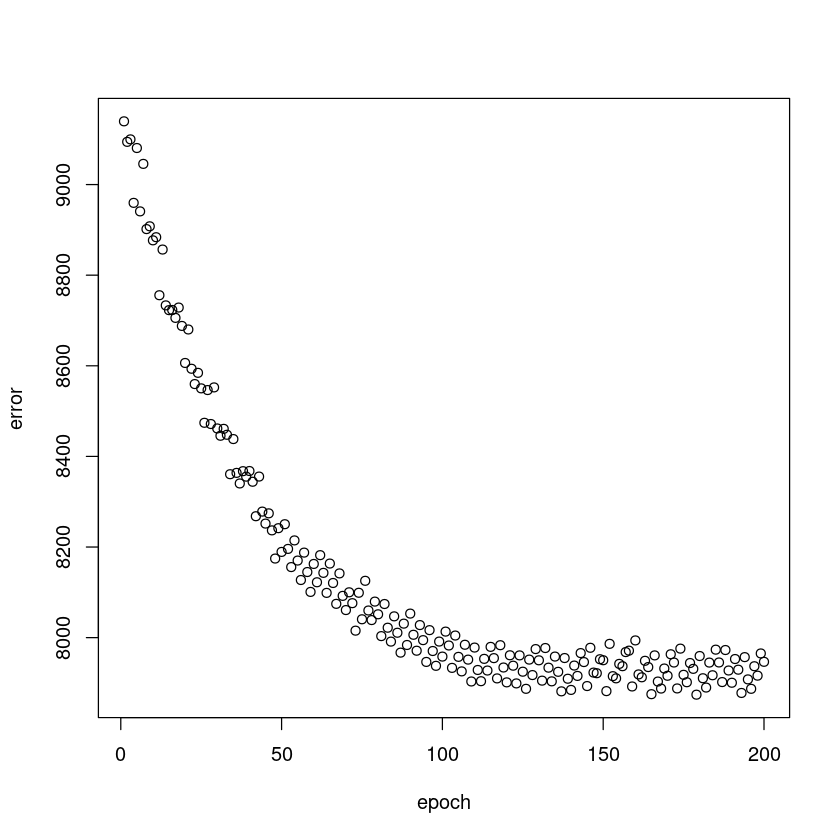

In [693]:
plot(epoch,error)

In [694]:
w_best_low_r<-w_best

In [695]:
p_val=sig(phi_val%*%w)

In [696]:
y_pred=round(p_val)

In [697]:
length(y_pred[y_pred==y_val & y_val==1])/length(y_val[y_val==1])

[1] 0.841629

In [698]:
length(y_pred[y_pred==y_val ])/length(y_pred)

[1] 0.6314912

In [462]:
#High accuracy, 80 recall
#write.csv(w_best,"w_best1.csv")

In [688]:
#Low accuracy, high recall
write.csv(w,"w_best2.csv")

In [196]:
w<-read.csv("w_best2.csv", header = TRUE)

In [197]:
w[order(-abs(w["V1"])),]

,X,V1
35,ay_001,1.078573214
95,cj_000,1.066790182
11,ag_003,0.639165055
159,ee_001,0.455658926
99,cn_000,0.447853652
42,ay_008,-0.358648394
119,cs_006,0.335000108
96,ck_000,0.314824155
115,cs_002,-0.305680712
167,ee_009,0.212274756


In [198]:
w<-as.matrix(w[,2])

In [199]:
jpeg("w_hist.jpg")
hist(w, ,col="chocolate")
dev.off()

png 
  2

In [200]:
p_test=sig(phi_test%*%w)

y_pred=round(p_test)

In [201]:
length(y_pred[y_pred==y_test & y_test==1])/length(y_test[y_test==1])

length(y_pred[y_pred==y_test ])/length(y_pred)

[1] 0.9348837

[1] 0.8301903

In [211]:
thresholds<-as.matrix(seq(1.0, 0.0, by = -0.001))

In [212]:
p_return<-function(X,Y){
    if (X>Y){
        return(1)
    } else {
        return(0)
    }
}

In [213]:
TPR<-function(thr,p,y){
    y_pred<-apply(p,1,p_return, Y=thr)
    return(length(y_pred[y_pred==y & y==1])/length(y[y==1]))
}

In [214]:
FPR<-function(thr,p,y){
    y_pred<-apply(p,1,p_return, Y=thr)
    return(length(y_pred[y_pred==1 & y==0])/length(y[y==0]))
}

In [215]:
truepos<-apply(thresholds,1,TPR, p=p_test, y=y_test)

In [216]:
falsepos<-apply(thresholds,1,FPR, p=p_test, y=y_test)

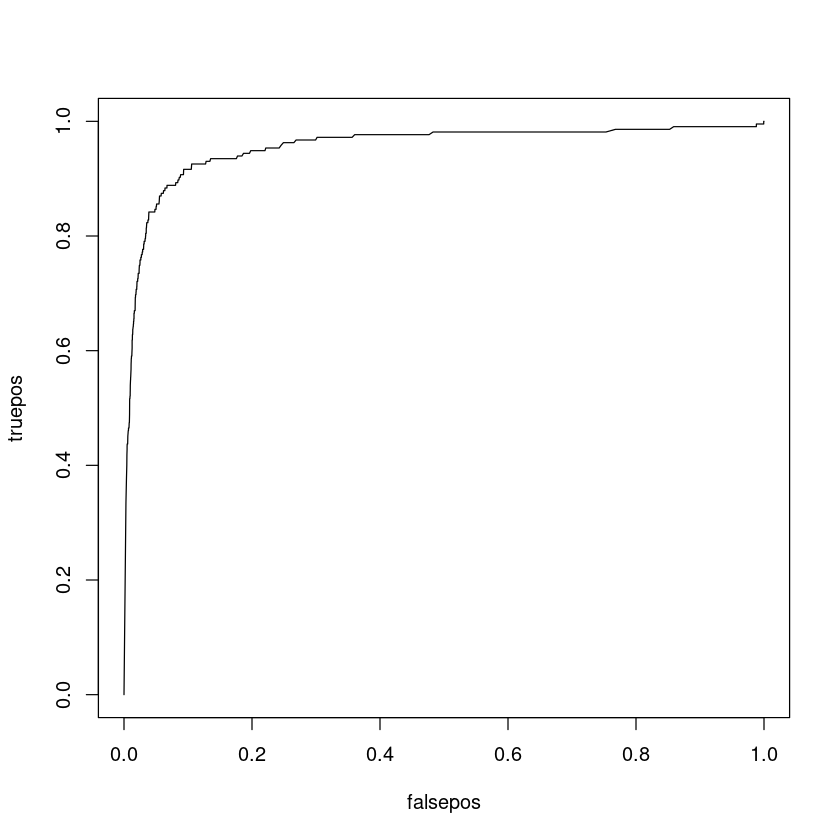

In [217]:
plot(falsepos,truepos, type="n")
lines(falsepos,truepos)

In [218]:
auc<-0.5*(sum(diff(falsepos)*(truepos[1:1000]))+sum(diff(falsepos)*(truepos[2:1001])))

In [219]:
auc

[1] 0.9555146